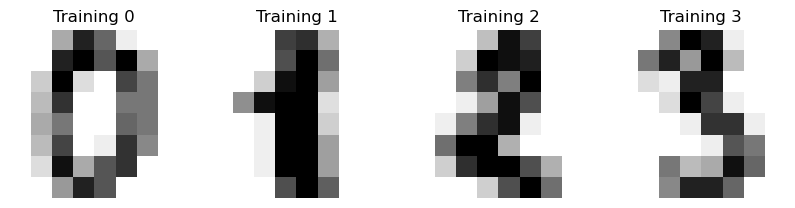

In [77]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()

fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap = plt.cm.gray_r, interpolation = 'nearest')
    ax.set_title(f'Training {label}')

In [78]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import numpy as np

X_digits, Y_digits = load_digits(return_X_y = True)
X_train, X_test, Y_train, Y_test = train_test_split(X_digits, Y_digits, test_size=0.5)

scaler = MinMaxScaler()
scaled_X_digits = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=1)
log = LogisticRegressionCV(penalty='l2', max_iter=10000)

knn.fit(scaled_X_digits, Y_train)
log.fit(scaled_X_digits, Y_train)

Y_hat_knn = knn.predict(scaled_X_test)
Y_hat_log = log.predict(scaled_X_test)

print(classification_report(Y_test, Y_hat_knn))
print(classification_report(Y_test, Y_hat_log))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       0.91      1.00      0.95        81
           2       1.00      1.00      1.00        99
           3       0.99      0.99      0.99        87
           4       0.99      0.98      0.98        96
           5       1.00      0.98      0.99        90
           6       0.99      1.00      0.99        81
           7       0.99      0.99      0.99        84
           8       0.99      0.93      0.96       100
           9       0.97      0.97      0.97        96

    accuracy                           0.98       899
   macro avg       0.98      0.98      0.98       899
weighted avg       0.98      0.98      0.98       899

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        85
           1       0.86      1.00      0.93        81
           2       0.98      0.97      0.97        99
           3       0.98 

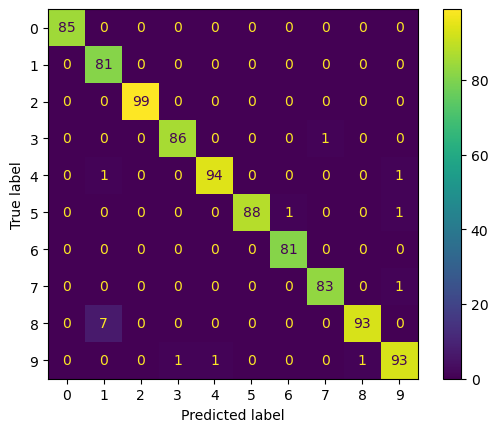

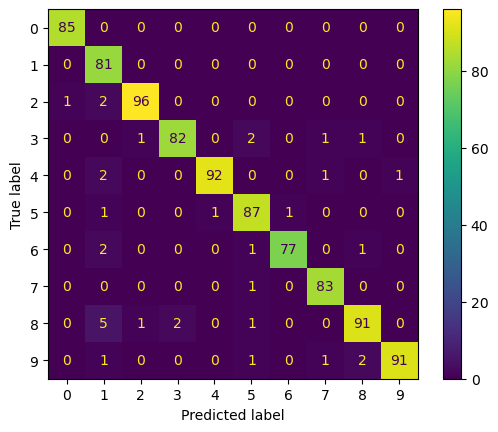

In [79]:
cm_knn = confusion_matrix(Y_test, Y_hat_knn)
cm_log = confusion_matrix(Y_test, Y_hat_log)

disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=digits.target_names)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=digits.target_names)

disp_knn.plot()
disp_log.plot()

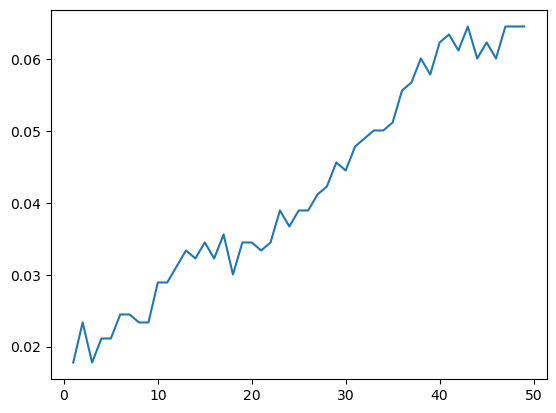

In [80]:
from sklearn.metrics import accuracy_score

error = 1 - accuracy_score(Y_test, Y_hat_knn)
error_list = []
for i in range(1, 50):
    model_knn = KNeighborsClassifier(n_neighbors=i)
    model_knn.fit(scaled_X_digits, Y_train)
    Y_hat_knn = model_knn.predict(scaled_X_test)
    error = 1 - accuracy_score(Y_test, Y_hat_knn)
    error_list.append(error)

plt.plot(range(1, 50), error_list)